In [1]:
ls

 Volume in drive C is OS
 Volume Serial Number is C803-CD91

 Directory of C:\Users\Miya\Desktop\jp

12/24/2016  04:40 PM    <DIR>          .
12/24/2016  04:40 PM    <DIR>          ..
12/23/2016  04:38 PM            15,364 .DS_Store
12/23/2016  12:54 PM    <DIR>          .idea
12/24/2016  04:40 PM    <DIR>          .ipynb_checkpoints
12/23/2016  04:38 PM               712 derby.log
12/24/2016  02:36 PM           233,667 EDA_PySpark.ipynb
12/24/2016  03:23 PM    <DIR>          facts
12/23/2016  04:38 PM    <DIR>          metastore_db
12/24/2016  04:29 PM        99,848,366 ML_data.csv
12/23/2016  12:54 PM             3,867 RawData.py
12/23/2016  12:54 PM             1,069 README.md
12/23/2016  12:54 PM           176,003 Untitled.ipynb
12/24/2016  04:40 PM                72 Untitled1.ipynb
12/24/2016  02:05 PM    <DIR>          viz
12/24/2016  02:04 PM           339,944 Volumn_VIZ.ipynb
12/23/2016  12:55 PM         1,050,624 weather.db
12/23/2016  12:54 PM             1,588 WeatherData.py

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from sklearn import cross_validation
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('ML_data.csv',index_col = 0)

In [15]:
data.head()

,index,year,Holiday,Passenger_count,RateCodeID,Store_and_fwd_flag,Trip_distance,Trip_type,Pick_up_hour,month,weekofday,interval_min,Fare_amount,Trip_distance.1,temp,icon,windBearing,windSpeed,visibility,Efficiency
0,15,2015,1,1.0,1,N,0.58,1.0,0,1,3,2.183333,4.0,0.58,28.16,clear-night,254.0,8.99,10.0,1.832061
1,22,2015,1,1.0,1,N,5.00,1.0,0,1,3,16.833333,17.0,5.00,28.16,clear-night,254.0,8.99,10.0,1.009901
2,86,2015,1,1.0,1,N,7.10,1.0,0,1,3,20.500000,22.5,7.10,28.16,clear-night,254.0,8.99,10.0,1.097561
3,108,2015,1,1.0,1,N,1.47,1.0,0,1,3,5.850000,6.5,1.47,28.16,clear-night,254.0,8.99,10.0,1.111111
4,138,2015,1,1.0,1,N,0.84,1.0,0,1,3,2.116667,4.5,0.84,28.16,clear-night,254.0,8.99,10.0,2.125984


(1, 5)

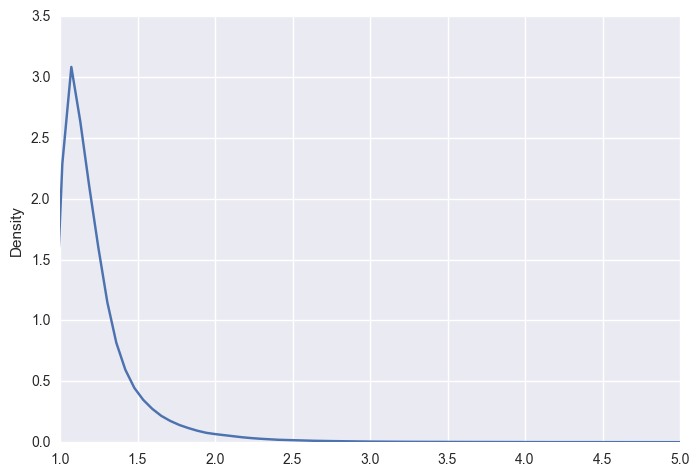

In [3]:
ax = data['Efficiency'].plot.kde()
ax.set_xlim((1, 5))

In [34]:
data.describe()['Efficiency']

count    831682.000000
mean          1.266382
std           0.610673
min           1.000255
25%           1.069418
50%           1.159154
75%           1.304348
max          30.000000
Name: Efficiency, dtype: float64

In [38]:
data.isnull().any()

index                 False
year                  False
Holiday               False
Passenger_count       False
RateCodeID            False
Store_and_fwd_flag    False
Trip_distance         False
Trip_type             False
Pick_up_hour          False
month                 False
weekofday             False
interval_min          False
Fare_amount           False
Trip_distance.1       False
temp                  False
icon                  False
windBearing           False
windSpeed             False
visibility            False
Efficiency            False
dtype: bool

In [83]:
label = []
label_prep = data['Efficiency'].values
for i in label_prep:
    if i > 1.159154:
        label.append('G')
    else:
        label.append('B')
data['label'] = label

In [84]:
data.columns

Index(['index', 'year', 'Holiday', 'Passenger_count', 'RateCodeID',
       'Store_and_fwd_flag', 'Trip_distance', 'Trip_type', 'Pick_up_hour',
       'month', 'weekofday', 'interval_min', 'Fare_amount', 'Trip_distance.1',
       'temp', 'icon', 'windBearing', 'windSpeed', 'visibility', 'Efficiency',
       'label'],
      dtype='object')

In [52]:
data['Holiday'] = data['Holiday'].apply(str)
data['RateCodeID'] = data['RateCodeID'].apply(str)
data['RateCodeID'] = data['RateCodeID'].apply(str)
data['Trip_type'] = data['Trip_type'].apply(str)
data['Trip_type'] = data['Trip_type'].apply(str)
data['month'] = data['month'].apply(str)
data['weekofday'] = data['weekofday'].apply(str)
data['icon'] = data['icon'].apply(str)
data['Trip_type'] = data['Trip_type'].apply(str)
data['Trip_type'] = data['Trip_type'].apply(str)

In [85]:
features = ['Holiday', 'Passenger_count', 'RateCodeID',
            'Store_and_fwd_flag', 'Trip_distance', 'Trip_type', 'Pick_up_hour',
            'month', 'weekofday',
            'temp', 'icon', 'windBearing', 'windSpeed', 'visibility']

In [86]:
from sklearn.preprocessing import LabelEncoder

#Auto encodes any dataframe column of type category or object.
def dummyEncode(df):
        columnsToEncode = list(df.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                df[feature] = le.fit_transform(df[feature])
            except:
                print('Error encoding '+feature)
        return df
data_transformed = dummyEncode(data)

In [87]:
data_transformed['icon'].unique()

array([1, 0, 5, 4, 6, 3, 2, 8, 7], dtype=int64)

In [88]:
X = data_transformed[features].values
Y= data_transformed['label']

In [72]:
X.shape

(831682, 14)

In [89]:
forest = RandomForestClassifier()
scores_RF = cross_val_score(forest,X,Y,cv=10,scoring = 'f1_weighted') ###tried cv=10: 0.788

forest.fit(X,Y)
importances_allfeatures = forest.feature_importances_
importances_allfeatures[:3]

std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances_allfeatures)[::-1]

1. Trip_distance (0.683518)
2. windSpeed (0.061272)
3. temp (0.060769)
4. windBearing (0.058185)
5. Pick_up_hour (0.031848)
6. Passenger_count (0.026681)
7. month (0.025062)
8. weekofday (0.020225)
9. icon (0.013115)
10. visibility (0.011224)
11. RateCodeID (0.003755)
12. Store_and_fwd_flag (0.001919)
13. Trip_type (0.001242)
14. Holiday (0.001186)


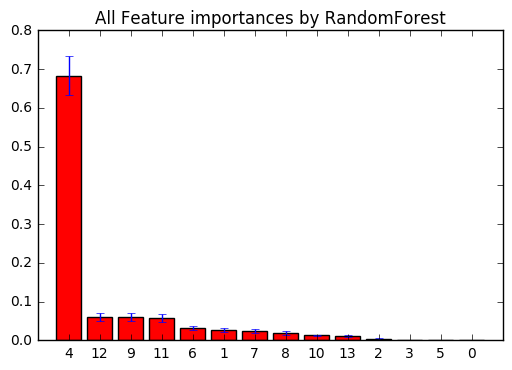

In [90]:
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, data_transformed[features].columns[indices[f]], importances_allfeatures[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("All Feature importances by RandomForest")
plt.bar(range(X.shape[1]), importances_allfeatures[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [93]:
GB = GradientBoostingClassifier(n_estimators=100, learning_rate=0.02,
                                max_depth=3, random_state=0)
scores_GB = cross_val_score(GB,X,Y,scoring = 'accuracy',cv = 10) 
scores_GB.mean()

0.71507022011534349

In [91]:
scores_RF.mean()

0.66342061207032565

In [94]:
scores_RF

array([ 0.66468978,  0.67826966,  0.67986124,  0.66733561,  0.62407299,
        0.64031443,  0.64550901,  0.66789861,  0.68080825,  0.68544654])

In [ ]:
import pickle
with open('Classifier_GB.pickle', 'wb') as handle:
    pickle.dump(GB, handle, protocol=pickle.HIGHEST_PROTOCOL)